In [1]:
%%capture
!pip install ultralytics

In [2]:
import warnings
warnings.filterwarnings('ignore')

import glob
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
import torch
from PIL import Image
from IPython.display import display, Video
from ultralytics import YOLO
from collections import deque
import subprocess

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_dir = "/content/drive/MyDrive/CarNumberDetectionForUZBcars/train_val/images/train"
val_dir = "/content/drive/MyDrive/CarNumberDetectionForUZBcars/train_val/images/val"

classes = ["license_plate"]

data_yaml_content = f"""
train: {train_dir}
val: {val_dir}

nc: {len(classes)}
names: {classes}
"""

yaml_path = '/content/drive/MyDrive/CarNumberDetectionForUZBcars/train_val/data.yaml'
os.makedirs(os.path.dirname(yaml_path), exist_ok=True)

with open(yaml_path, "w") as f:
    f.write(data_yaml_content)

In [5]:
print("Train exists:", os.path.exists("/content/drive/MyDrive/CarNumberDetectionForUZBcars/train_val/images/train"))
print("Val exists:", os.path.exists("/content/drive/MyDrive/CarNumberDetectionForUZBcars/train_val/images/val"))

!ls /content/drive/MyDrive/CarNumberDetectionForUZBcars/train_val/images

Train exists: True
Val exists: True
train  val


In [6]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 146MB/s]


In [7]:
results = model.train(
    data="/content/drive/MyDrive/CarNumberDetectionForUZBcars/train_val/data.yaml",
    epochs=50,
    imgsz=640,
    lr0=0.0005,
    batch=10,
    lrf=0.1,
    augment=True,
    project="/content/drive/MyDrive/CarNumberDetectionForUZBcars/working",
    name="yolov8_train"
)

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/CarNumberDetectionForUZBcars/train_val/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0005, lrf=0.1, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, 

100%|██████████| 755k/755k [00:00<00:00, 21.1MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 102MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.1±0.0 MB/s, size: 51.7 KB)


train: Scanning /content/drive/MyDrive/CarNumberDetectionForUZBcars/train_val/labels/train... 59 images, 0 backgrounds, 0 corrupt: 100%|██████████| 59/59 [00:51<00:00,  1.15it/s]

train: New cache created: /content/drive/MyDrive/CarNumberDetectionForUZBcars/train_val/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.1±0.0 MB/s, size: 61.8 KB)


val: Scanning /content/drive/MyDrive/CarNumberDetectionForUZBcars/train_val/labels/val... 12 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12/12 [00:08<00:00,  1.38it/s]

val: New cache created: /content/drive/MyDrive/CarNumberDetectionForUZBcars/train_val/labels/val.cache


Plotting labels to /content/drive/MyDrive/CarNumberDetectionForUZBcars/working/yolov8_train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/CarNumberDetectionForUZBcars/working/yolov8_train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.66G      1.549      4.836      1.532         42        640: 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]

                   all         12         12   0.000278     0.0833   0.000163   9.76e-05

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       2/50      3.67G      1.525      4.498      1.505         46        640: 100%|██████████| 2/2 [00:00<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         12         12   0.000278     0.0833   0.000159   9.57e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.67G      1.406      4.557      1.473         43        640: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]

                   all         12         12   0.000278     0.0833   0.000162   9.73e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.71G      1.433      4.534      1.441         39        640: 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.53it/s]

                   all         12         12    0.00306      0.917    0.00516    0.00378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.72G      1.016      3.771      1.046         42        640: 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         12         12    0.00333          1      0.101     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.74G     0.8948      3.132     0.9682         43        640: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all         12         12    0.00333          1      0.217      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.76G     0.8594      2.245     0.9297         39        640: 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all         12         12    0.00333          1       0.55      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.77G      0.767      1.791     0.9203         46        640: 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         12         12    0.00333          1      0.614      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.79G     0.9233      1.979     0.9376         39        640: 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]


                   all         12         12    0.00333          1      0.105     0.0591

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.81G     0.8706      1.899     0.9363         42        640: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]

                   all         12         12    0.00333          1     0.0342     0.0218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.82G     0.8882      2.002     0.9336         42        640: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         12         12    0.00333          1       0.15      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.84G     0.9341      1.796     0.9431         41        640: 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         12         12    0.00333          1      0.747      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.86G     0.9291      1.537     0.9387         50        640: 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all         12         12    0.00333          1      0.747      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.88G     0.8663      1.651       0.93         48        640: 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all         12         12    0.00333          1      0.348      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.89G     0.8503      1.471     0.8855         36        640: 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         12         12    0.00333          1     0.0143     0.0113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.91G     0.8104      1.332     0.8877         45        640: 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         12         12    0.00333          1     0.0122    0.00995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.93G     0.7785      1.285     0.9093         48        640: 100%|██████████| 2/2 [00:00<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         12         12    0.00333          1      0.012    0.00934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.95G     0.8074      1.226     0.9051         40        640: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         12         12    0.00333          1    0.00762    0.00653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.96G     0.7848      1.431     0.9058         34        640: 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.85it/s]

                   all         12         12    0.00333          1    0.00719    0.00586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.98G     0.7395      1.281     0.8834         41        640: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         12         12    0.00333          1    0.00721    0.00589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         4G     0.7637       1.29     0.9259         40        640: 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         12         12    0.00333          1    0.00787    0.00678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.01G     0.7796      1.174     0.8859         49        640: 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         12         12    0.00333          1     0.0468     0.0388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.03G     0.7426      1.201     0.9317         43        640: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all         12         12    0.00333          1       0.48      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.05G     0.6101      1.234     0.8907         37        640: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.14it/s]

                   all         12         12    0.00333          1      0.519      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.06G     0.7792      1.178     0.9425         44        640: 100%|██████████| 2/2 [00:00<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         12         12    0.00306      0.917      0.269      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.08G     0.7805        1.2     0.9349         48        640: 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         12         12    0.00333          1      0.452      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       4.1G     0.7171      1.148     0.8862         47        640: 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         12         12    0.00446      0.833      0.577      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.12G      0.704      1.123     0.8793         59        640: 100%|██████████| 2/2 [00:00<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all         12         12          1      0.798      0.836      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.13G     0.7476      1.016     0.8938         49        640: 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.81it/s]

                   all         12         12          1      0.616      0.836      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.15G     0.7405      1.086     0.8943         47        640: 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all         12         12          1      0.695      0.839      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.17G     0.6769     0.9919     0.8792         49        640: 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.68it/s]

                   all         12         12          1      0.744      0.915      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.19G     0.7015     0.9907     0.8777         61        640: 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         12         12          1      0.802      0.915      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.2G     0.7009      1.067     0.8651         40        640: 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]


                   all         12         12          1      0.817      0.915      0.782

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.22G     0.6455      1.018     0.9104         47        640: 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         12         12      0.996      0.917      0.915      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.24G     0.6944      1.043     0.8605         44        640: 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         12         12      0.964      0.917      0.915      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.25G     0.7399      1.033     0.9046         46        640: 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         12         12      0.966      0.917      0.915      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.27G     0.6663     0.9803     0.8607         43        640: 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         12         12      0.975      0.917      0.915      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.29G     0.6937     0.9391     0.8817         47        640: 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]

                   all         12         12      0.992      0.917      0.915      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       4.3G     0.6087     0.9682     0.8416         44        640: 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         12         12          1      0.831      0.915      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.32G      0.647      0.964      0.895         38        640: 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         12         12          1      0.834      0.915      0.778


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.34G     0.6043      1.106     0.8351         28        640: 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         12         12          1      0.875      0.916      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.36G     0.5199      1.029     0.8239         31        640: 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         12         12      0.987      0.917      0.916       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.37G     0.5322      1.064     0.8397         29        640: 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         12         12       0.98      0.917      0.916      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.39G      0.533      1.021     0.8339         29        640: 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all         12         12      0.999      0.917      0.916      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.41G     0.4983     0.9728     0.8213         32        640: 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]

                   all         12         12          1      0.904      0.915      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.43G     0.5326     0.9916     0.8324         27        640: 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         12         12          1      0.904      0.915      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.44G     0.5071     0.9985     0.8303         28        640: 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]

                   all         12         12          1      0.904      0.915      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.46G     0.5142     0.9958     0.8269         29        640: 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.53it/s]

                   all         12         12          1      0.903      0.915      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.47G     0.6053      1.054     0.8814         30        640: 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         12         12          1      0.903      0.915      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.49G     0.5053     0.9577      0.819         30        640: 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.22it/s]


                   all         12         12          1      0.904      0.915      0.852

50 epochs completed in 0.021 hours.
Optimizer stripped from /content/drive/MyDrive/CarNumberDetectionForUZBcars/working/yolov8_train/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/CarNumberDetectionForUZBcars/working/yolov8_train/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/CarNumberDetectionForUZBcars/working/yolov8_train/weights/best.pt...
Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


                   all         12         12      0.922       0.98      0.963      0.874
Speed: 0.2ms preprocess, 16.9ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to /content/drive/MyDrive/CarNumberDetectionForUZBcars/working/yolov8_train


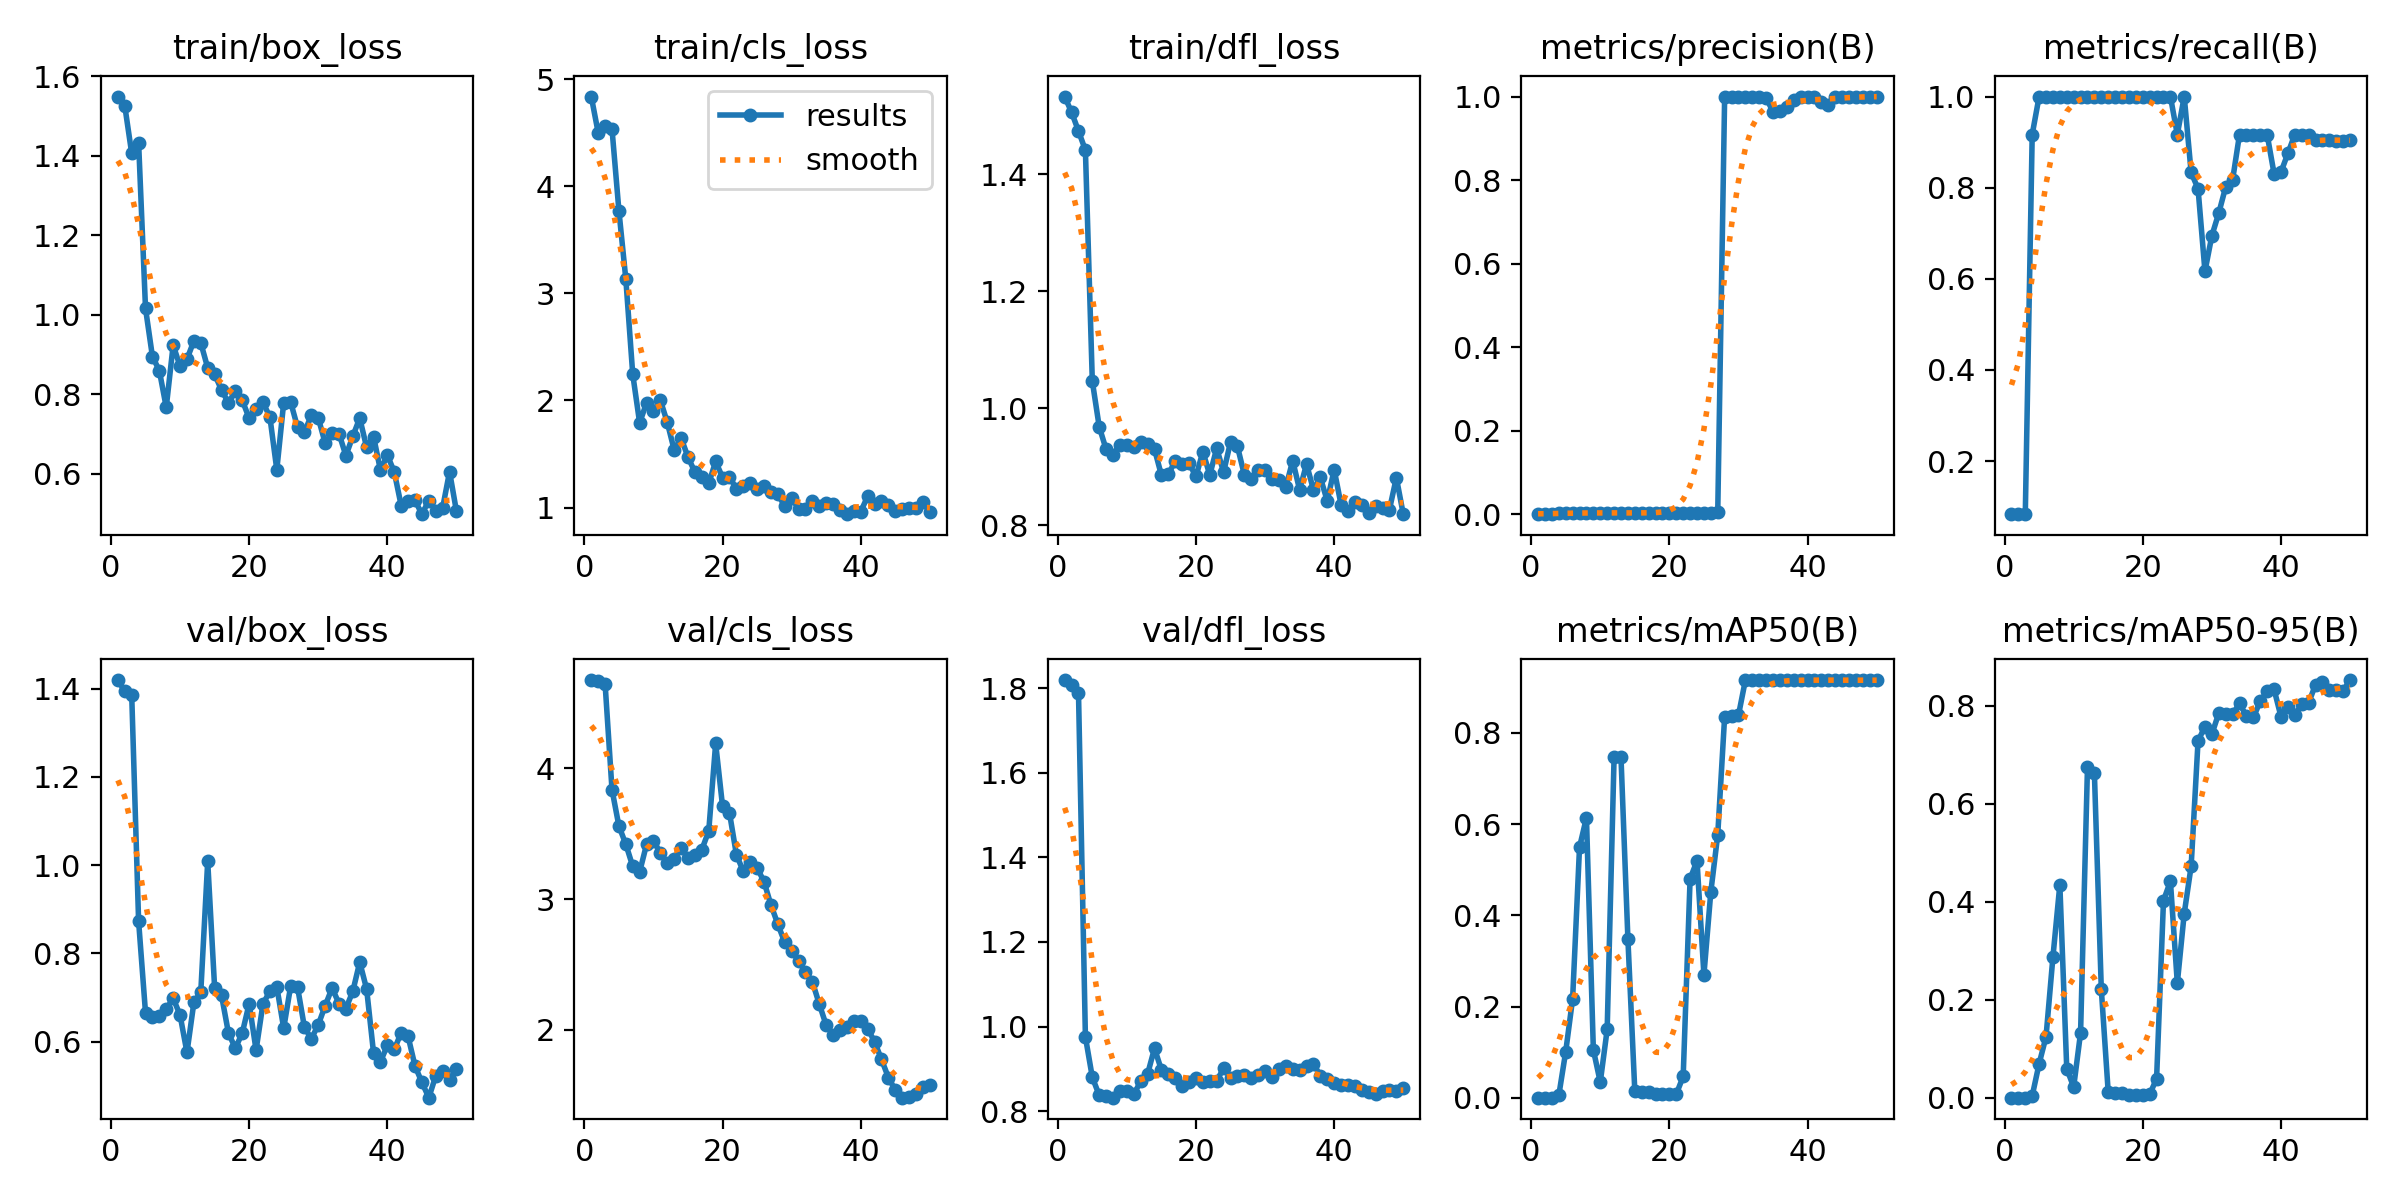

In [8]:
train_results = "/content/drive/MyDrive/CarNumberDetectionForUZBcars/working/yolov8_train/results.png"


if os.path.exists(train_results):
    img = Image.open(train_results)
    display(img)
else:
    print("Training results image not found.")

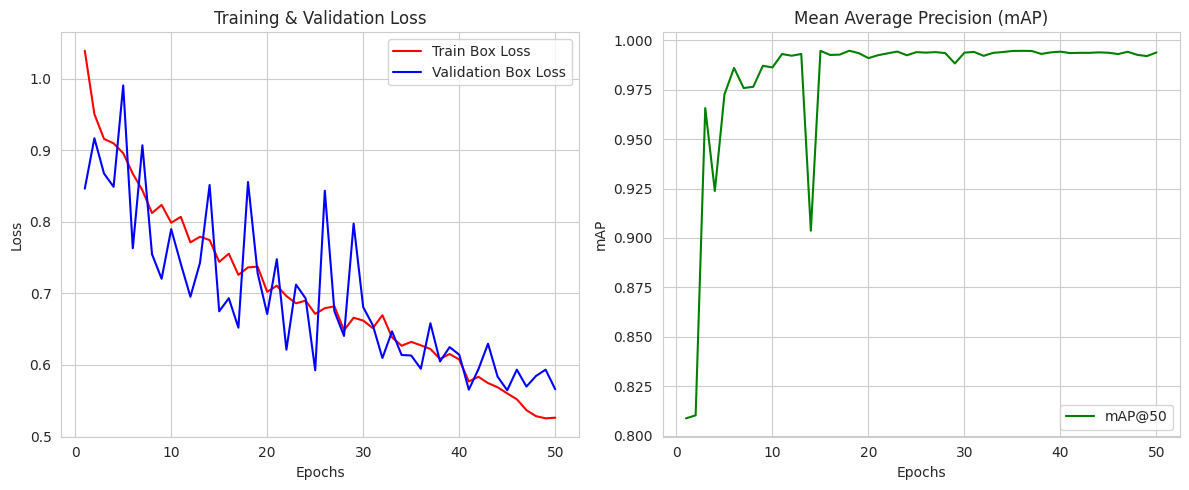

In [9]:
map_column = "metrics/mAP50(B)"
loss_column_train = "train/box_loss"
loss_column_val = "val/box_loss"

df = pd.read_csv("/content/drive/MyDrive/CarNumberDetection/working/yolov8_train/results.csv")

plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")

plt.subplot(1, 2, 1)
plt.plot(df["epoch"], df[loss_column_train], label="Train Box Loss", color="red")
plt.plot(df["epoch"], df[loss_column_val], label="Validation Box Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df["epoch"], df[map_column], label="mAP@50", color="green")
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.title("Mean Average Precision (mAP)")
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
%%capture
!pip install easyocr

In [11]:
import random
import glob
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import easyocr

model_path = "/content/drive/MyDrive/CarNumberDetectionForUZBcars/working/yolov8_train/weights/best.pt"
model = YOLO(model_path)
reader = easyocr.Reader(['en'])

def detect_and_read_license_plate(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Rasm o'qilmadi: {image_path}")
        return None
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results = model.predict(img_rgb)
    result = results[0]

    boxes = result.boxes.xyxy.cpu().numpy()
    confidences = result.boxes.conf.cpu().numpy()

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)

        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img_rgb, f"{confidences[i]:.2f}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        plate_img = img_rgb[y1:y2, x1:x2]

        ocr_result = reader.readtext(plate_img)
        if ocr_result:
            text = ' '.join([res[1] for res in ocr_result])
            print(f"Number found: {text}")
            cv2.putText(img_rgb, text, (x1, y2 + 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        else:
            print("not found")

    return img_rgb

all_images = glob.glob("/content/drive/MyDrive/CarNumberDetectionForUZBcars/working/images/*.jpeg")
test_images = random.sample(all_images, 6)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for img_path, ax in zip(test_images, axes.flatten()):
    img_with_text = detect_and_read_license_plate(img_path)
    if img_with_text is not None:
        ax.imshow(img_with_text)
        ax.axis("off")
        ax.set_title(os.path.basename(img_path))

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.